In [46]:
library(ArchR)
set.seed(1)
addArchRThreads(threads = 10)
addArchRGenome("mm10")
library(tidyverse)
library(here)

Setting default number of Parallel threads to 10.

BSgenome for mm10 not installed! Now installing by the following:
	BiocManager::install("BSgenome.Mmusculus.UCSC.mm10")

'getOption("repos")' replaces Bioconductor standard repositories, see
'?repositories' for details

replacement repositories:
    CRAN: https://cran.r-project.org


Bioconductor version 3.12 (BiocManager 1.30.19), R 4.0.5 (2021-03-31)

Warning message:
“package(s) not installed when version(s) same as or greater than current; use
  `force = TRUE` to re-install: 'BSgenome.Mmusculus.UCSC.mm10'”
Old packages: 'bit', 'data.table', 'GenomicFeatures', 'ggpubr', 'mixsqp',
  'pbapply', 'pkgload', 'rsvg', 's2', 'shinyWidgets', 'slider',
  'spatstat.linnet', 'spData', 'systemPipeR', 'vctrs', 'xfun'

Setting default genome to Mm10.



# Visulization

Getting ImputeWeights

Getting Matrix Values...

2022-09-02 00:20:45 : 



ArchR logging to : ArchRLogs/ArchR-imputeMatrix-e46919678dc8-Date-2022-09-02_Time-00-20-52.log
If there is an issue, please report to github with logFile!

Using weights on disk

1 of 1

1 
2 
3 
4 
5 
6 


Picking joint bandwidth of 0.0157

Picking joint bandwidth of 0.0138



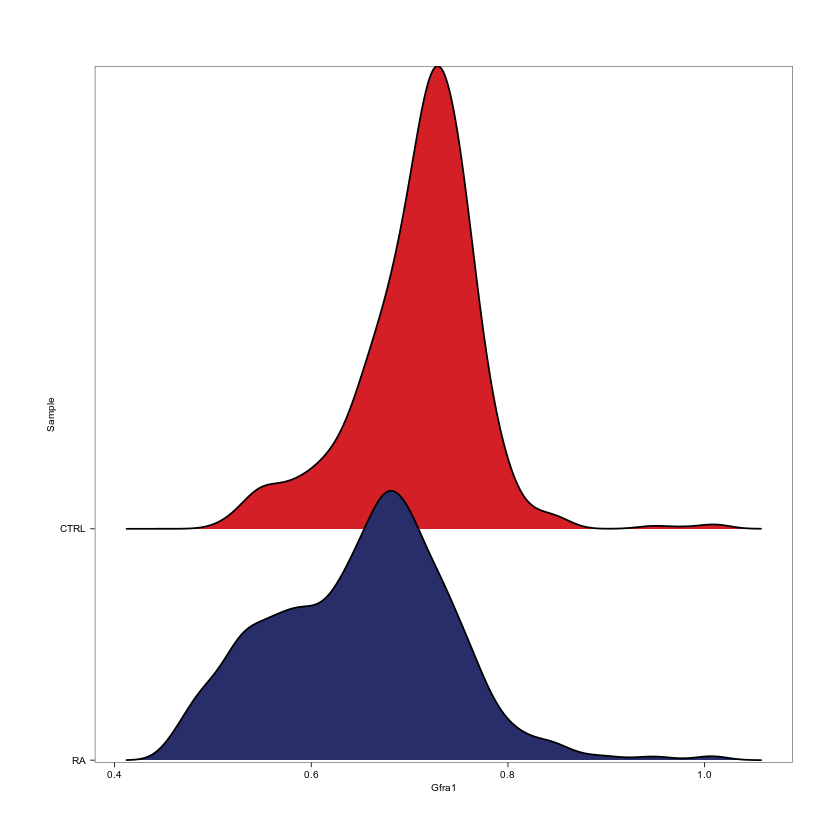

Picking joint bandwidth of 0.00612



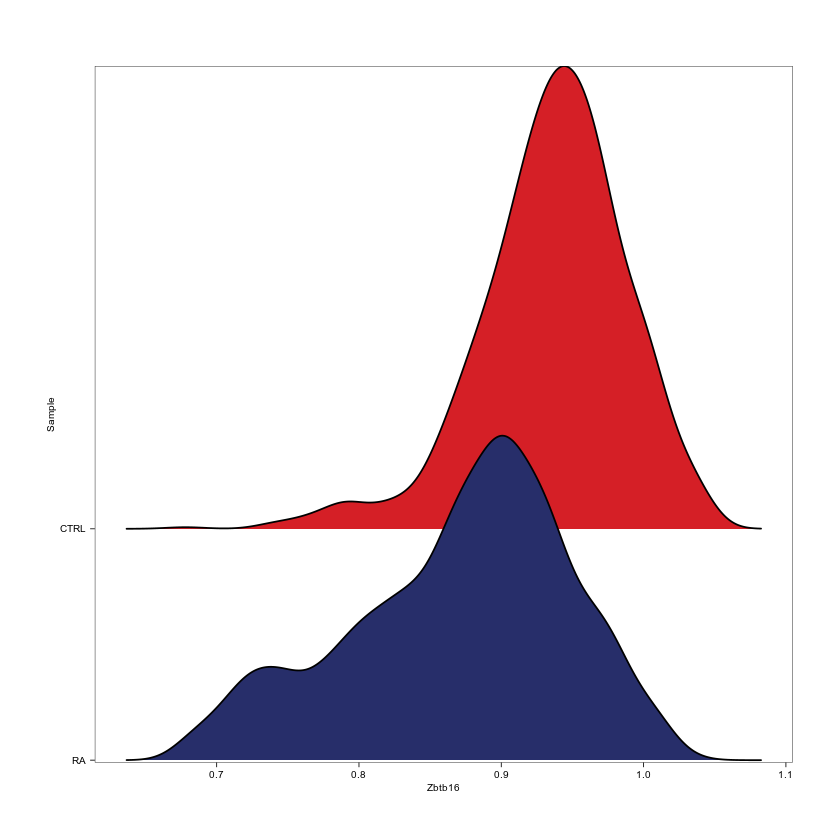

Picking joint bandwidth of 0.0463



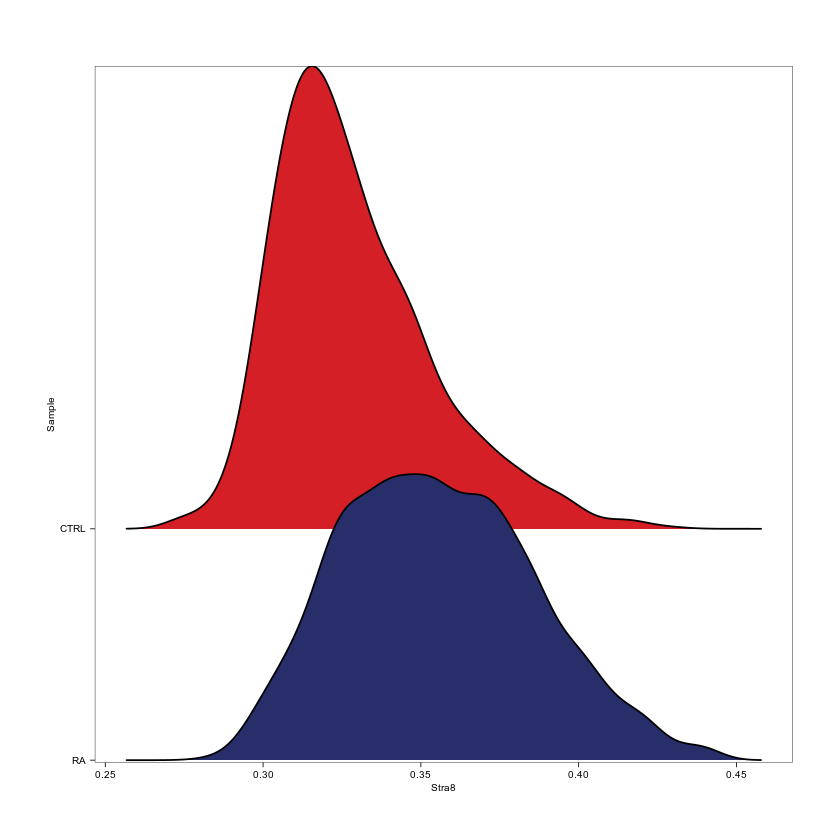

Picking joint bandwidth of 0.0257



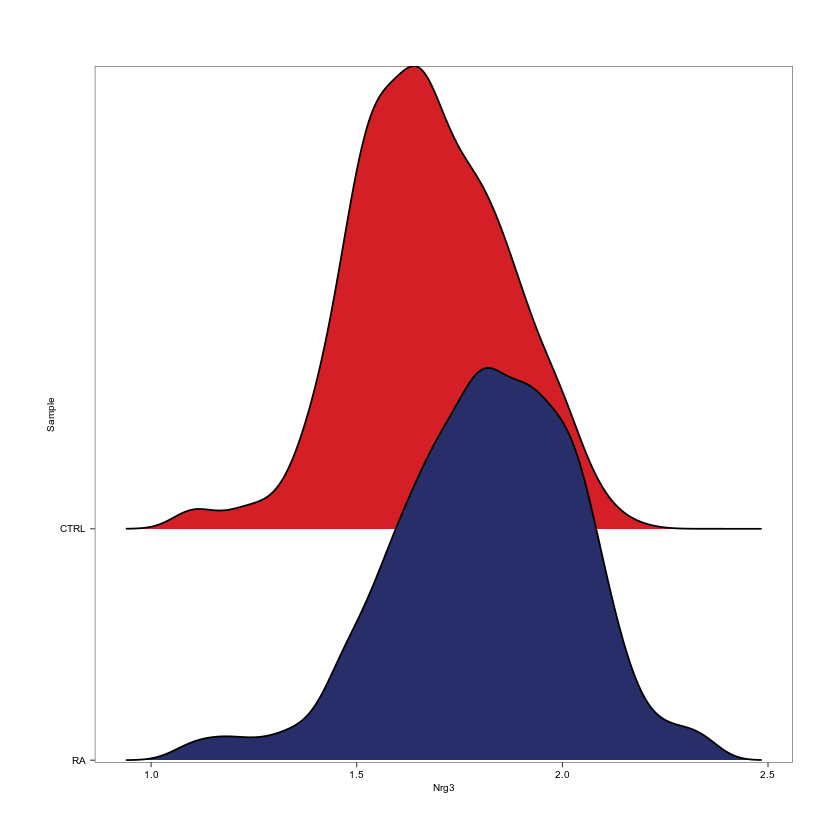

Picking joint bandwidth of 0.0069



$Gfra1

$Zbtb16

$Stra8

$Nrg3

$Rarb

$Kit


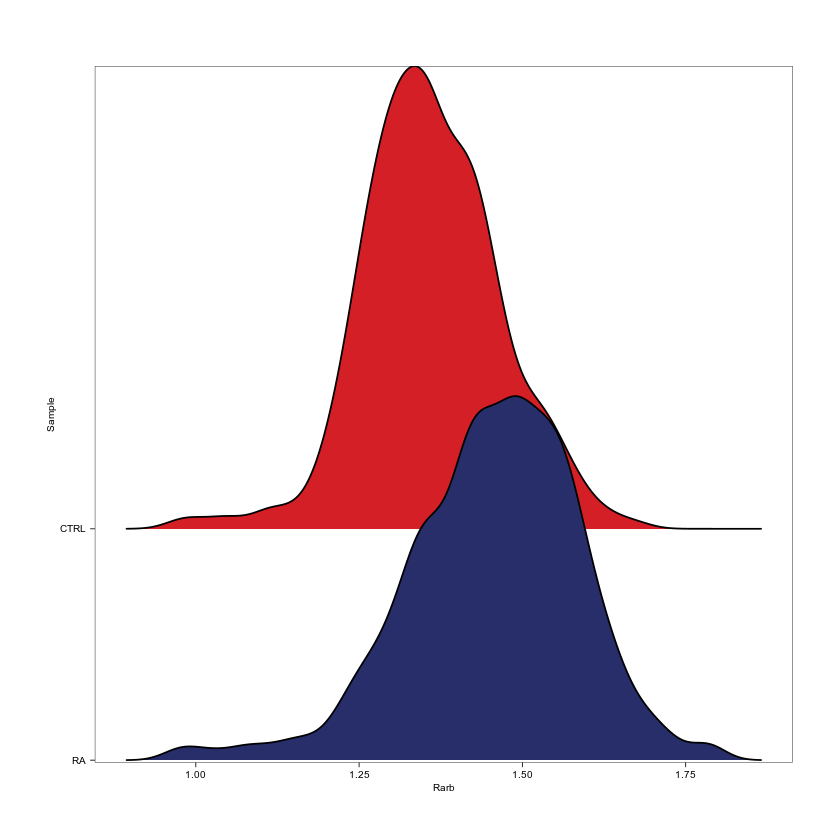

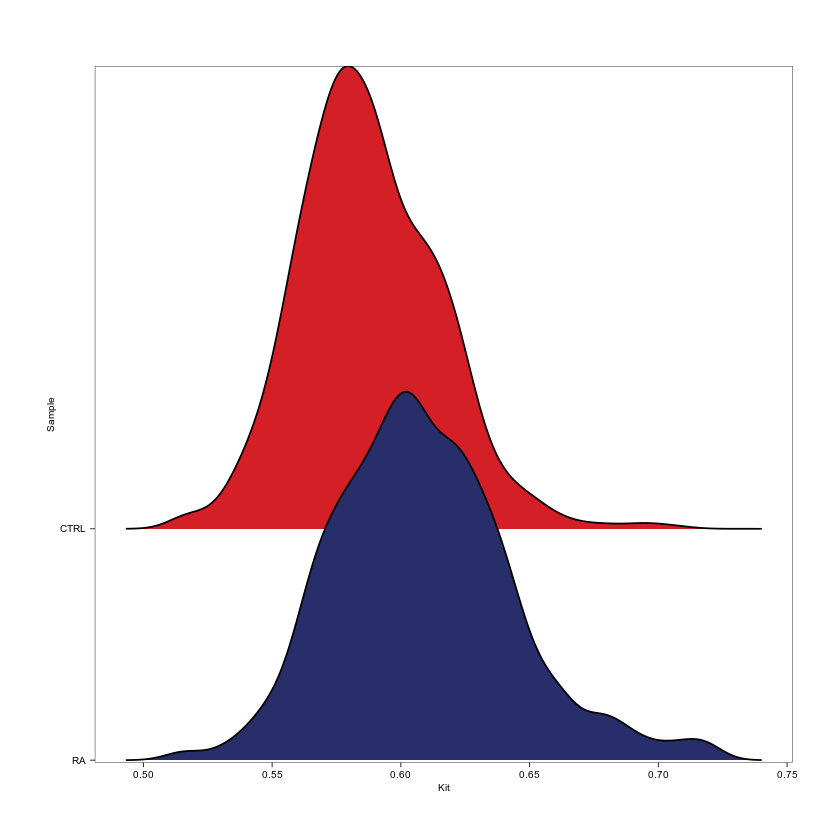

In [54]:
p3 <- plotGroups(
    ArchRProj = Merged.proj2, 
    groupBy = "Sample", 
    colorBy = "GeneScoreMatrix", 
    name = c("Gfra1", "Zbtb16", "Stra8", "Nrg3","Rarb","Kit"),
    plotAs = "ridges"
   )

p3

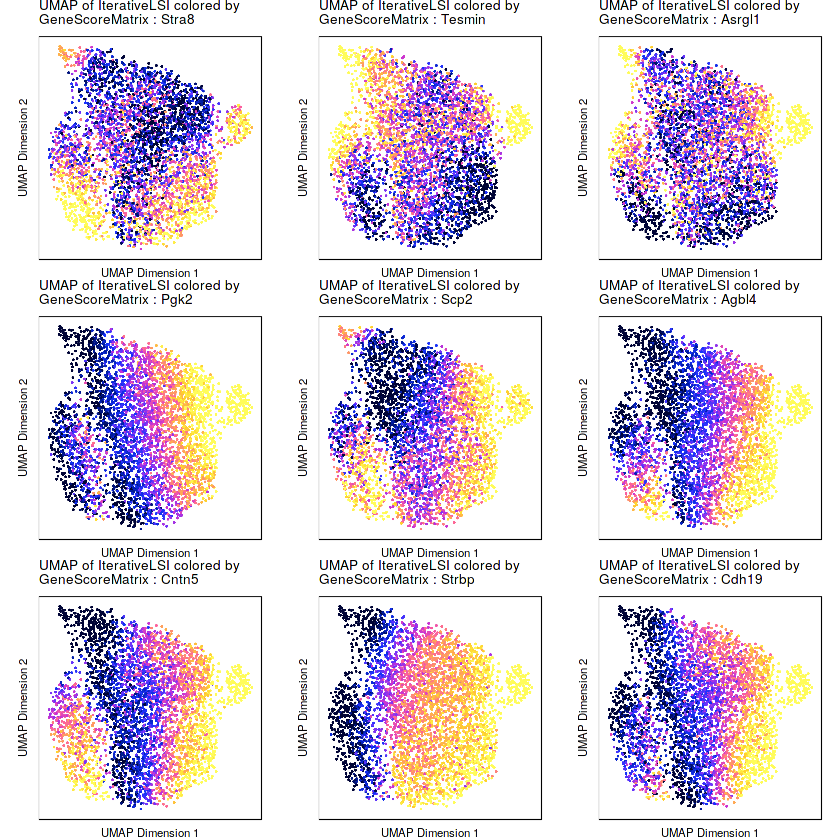

In [93]:
p2 <- lapply(p, function(x){
    x + guides(color = FALSE, fill = FALSE) + 
    theme_ArchR(baseSize = 6.5) +
    theme(plot.margin = unit(c(0, 0, 0, 0), "cm")) +
    theme(
        axis.text.x=element_blank(), 
        axis.ticks.x=element_blank(), 
        axis.text.y=element_blank(), 
        axis.ticks.y=element_blank()
    )
})
do.call(cowplot::plot_grid, c(list(ncol = 3),p2))

In [214]:
plotPDF(p3, name = "RA.gene.ridge.pdf", width = 3, height = 5)
# dev.off()

Plotting Ggplot!

Picking joint bandwidth of 0.0149

Picking joint bandwidth of 0.0149

Plotting Ggplot!

Picking joint bandwidth of 0.0108

Picking joint bandwidth of 0.0108

Plotting Ggplot!

Picking joint bandwidth of 0.00527

Picking joint bandwidth of 0.00527

Plotting Ggplot!

Picking joint bandwidth of 0.0411

Picking joint bandwidth of 0.0411

Plotting Ggplot!

Picking joint bandwidth of 0.0221

Picking joint bandwidth of 0.0221



In [223]:
# Topic
cellassign <- readRDS('CTRL-RA-cistopic-cellassign-p.rds')

In [241]:
CTRL.topic <- cellassign[1:2256,]
RA.topic <-  cellassign[2257:4144,]

In [ ]:
## To plot same scale use colorLimit =c(0,3)
Merged.proj2.RA.name <- Merged.proj2@cellColData %>% as.data.frame %>% filter(Sample=="RA") %>% rownames
Merged.proj2.RA.name <- intersect(Merged.proj2.RA.name, rownames(RA.topic))
Merged.proj.RA <- subsetArchRProject(Merged.proj2,cell=Merged.proj2.RA.name,outputDirectory = "/home/leetl/CTRLvsRA-scATAC/RA.topic",dropCells=FALSE,force= TRUE)
Merged.proj2.CTRL.name <- Merged.proj2@cellColData %>% as.data.frame %>% filter(Sample=="CTRL") %>% rownames
Merged.proj2.CTRL.name <- intersect(Merged.proj2.CTRL.name, rownames(CTRL.topic))
Merged.proj.CTRL <- subsetArchRProject(Merged.proj2,cell=Merged.proj2.CTRL.name,outputDirectory = "/home/leetl/CTRLvsRA-scATAC/CTRL.topic",dropCells=FALSE,force= TRUE)

In [259]:
Merged.proj.CTRL@cellColData <- cbind(Merged.proj.CTRL@cellColData, CTRL.topic[Merged.proj2.CTRL.name,] )

In [261]:
Merged.proj.RA@cellColData <- cbind(Merged.proj.RA@cellColData, RA.topic[Merged.proj2.RA.name,] )

In [316]:
p1 <- plotEmbedding(
    ArchRProj = Merged.proj.CTRL, 
    colorBy = "cellColData", 
    name = c("Topic6"), 
    embedding = "UMAP",
    size = 2,
    plotAs = "points",
     imputeWeights = getImputeWeights(Merged.proj.RA),
     quantCut = c(0, 1),
    colorLimit =c(0,0.09),
#     continuousSet = "horizonExtra"
    )
p2 <- plotEmbedding(
    ArchRProj = Merged.proj.RA, 
    colorBy = "cellColData", 
    name = c("Topic6"), 
    embedding = "UMAP",
    size = 2,
    plotAs = "points",
     imputeWeights = getImputeWeights(Merged.proj.RA),
     quantCut = c(0, 1),
    colorLimit =c(0.0,0.09),
#     continuousSet = "horizonExtra"
    )

pdf(file="CTRL_RA_T6_sep.pdf")
p1
p2
dev.off()

Getting ImputeWeights

No imputeWeights found, returning NULL

ArchR logging to : ArchRLogs/ArchR-plotEmbedding-74f95a06f9cb-Date-2021-11-12_Time-10-29-42.log
If there is an issue, please report to github with logFile!

Getting UMAP Embedding

ColorBy = cellColData

Plotting Embedding

1 


ArchR logging successful to : ArchRLogs/ArchR-plotEmbedding-74f95a06f9cb-Date-2021-11-12_Time-10-29-42.log

Getting ImputeWeights

No imputeWeights found, returning NULL

ArchR logging to : ArchRLogs/ArchR-plotEmbedding-74f944ae149e-Date-2021-11-12_Time-10-29-43.log
If there is an issue, please report to github with logFile!

Getting UMAP Embedding

ColorBy = cellColData

Plotting Embedding

1 


ArchR logging successful to : ArchRLogs/ArchR-plotEmbedding-74f944ae149e-Date-2021-11-12_Time-10-29-43.log



png 
  2

In [307]:
p1 <- plotEmbedding(
    ArchRProj = Merged.proj.CTRL, 
    colorBy = "cellColData", 
    name = c("Topic11"), 
    embedding = "UMAP",
    size = 2,
    plotAs = "points",
     imputeWeights = getImputeWeights(Merged.proj.RA),
     quantCut = c(0, 1),
    colorLimit =c(0,0.1),
#     continuousSet = "horizonExtra"
    )
p2 <- plotEmbedding(
    ArchRProj = Merged.proj.RA, 
    colorBy = "cellColData", 
    name = c("Topic11"), 
    embedding = "UMAP",
    size = 2,
    plotAs = "points",
     imputeWeights = getImputeWeights(Merged.proj.RA),
     quantCut = c(0, 1),
    colorLimit =c(0.0,0.1),
#     continuousSet = "horizonExtra"
    )

pdf(file="CTRL_RA_T11_sep.pdf")
p1
p2
dev.off()

Getting ImputeWeights

No imputeWeights found, returning NULL

ArchR logging to : ArchRLogs/ArchR-plotEmbedding-74f944baf90f-Date-2021-11-12_Time-10-22-42.log
If there is an issue, please report to github with logFile!

Getting UMAP Embedding

ColorBy = cellColData

Plotting Embedding

1 


ArchR logging successful to : ArchRLogs/ArchR-plotEmbedding-74f944baf90f-Date-2021-11-12_Time-10-22-42.log

Getting ImputeWeights

No imputeWeights found, returning NULL

ArchR logging to : ArchRLogs/ArchR-plotEmbedding-74f94ce9b6f1-Date-2021-11-12_Time-10-22-42.log
If there is an issue, please report to github with logFile!

Getting UMAP Embedding

ColorBy = cellColData

Plotting Embedding

1 


ArchR logging successful to : ArchRLogs/ArchR-plotEmbedding-74f94ce9b6f1-Date-2021-11-12_Time-10-22-42.log



png 
  2

In [305]:
p1 <- plotEmbedding(
    ArchRProj = Merged.proj.CTRL, 
    colorBy = "cellColData", 
    name = c("Topic10"), 
    embedding = "UMAP",
    size = 2,
    plotAs = "points",
     imputeWeights = getImputeWeights(Merged.proj.RA),
     quantCut = c(0, 1),
    colorLimit =c(0,0.2),
#     continuousSet = "horizonExtra"
    )
p2 <- plotEmbedding(
    ArchRProj = Merged.proj.RA, 
    colorBy = "cellColData", 
    name = c("Topic10"), 
    embedding = "UMAP",
    size = 2,
    plotAs = "points",
     imputeWeights = getImputeWeights(Merged.proj.RA),
     quantCut = c(0, 1),
    colorLimit =c(0.0,0.2),
#     continuousSet = "horizonExtra"
    )

pdf(file="CTRL_RA_T10_sep.pdf")
p1
p2
dev.off()


Getting ImputeWeights

No imputeWeights found, returning NULL

ArchR logging to : ArchRLogs/ArchR-plotEmbedding-74f95e5b7c3c-Date-2021-11-12_Time-10-21-57.log
If there is an issue, please report to github with logFile!

Getting UMAP Embedding

ColorBy = cellColData

Plotting Embedding

1 


ArchR logging successful to : ArchRLogs/ArchR-plotEmbedding-74f95e5b7c3c-Date-2021-11-12_Time-10-21-57.log

Getting ImputeWeights

No imputeWeights found, returning NULL

ArchR logging to : ArchRLogs/ArchR-plotEmbedding-74f947801b25-Date-2021-11-12_Time-10-21-57.log
If there is an issue, please report to github with logFile!

Getting UMAP Embedding

ColorBy = cellColData

Plotting Embedding

1 


ArchR logging successful to : ArchRLogs/ArchR-plotEmbedding-74f947801b25-Date-2021-11-12_Time-10-21-57.log



png 
  2

In [302]:
p1 <- plotEmbedding(
    ArchRProj = Merged.proj.CTRL, 
    colorBy = "cellColData", 
    name = c("Topic9"), 
    embedding = "UMAP",
    size = 2,
    plotAs = "points",
     imputeWeights = getImputeWeights(Merged.proj.RA),
     quantCut = c(0, 1),
    colorLimit =c(0,0.1),
#     continuousSet = "horizonExtra"
    )
p2 <- plotEmbedding(
    ArchRProj = Merged.proj.RA, 
    colorBy = "cellColData", 
    name = c("Topic9"), 
    embedding = "UMAP",
    size = 2,
    plotAs = "points",
     imputeWeights = getImputeWeights(Merged.proj.RA),
     quantCut = c(0, 1),
    colorLimit =c(0.0,0.1),
#     continuousSet = "horizonExtra"
    )

pdf(file="CTRL_RA_T9_sep.pdf")
p1
p2
dev.off()

Getting ImputeWeights

No imputeWeights found, returning NULL

ArchR logging to : ArchRLogs/ArchR-plotEmbedding-74f979625379-Date-2021-11-12_Time-10-20-50.log
If there is an issue, please report to github with logFile!

Getting UMAP Embedding

ColorBy = cellColData

Plotting Embedding

1 


ArchR logging successful to : ArchRLogs/ArchR-plotEmbedding-74f979625379-Date-2021-11-12_Time-10-20-50.log

Getting ImputeWeights

No imputeWeights found, returning NULL

ArchR logging to : ArchRLogs/ArchR-plotEmbedding-74f95445ed37-Date-2021-11-12_Time-10-20-50.log
If there is an issue, please report to github with logFile!

Getting UMAP Embedding

ColorBy = cellColData

Plotting Embedding

1 


ArchR logging successful to : ArchRLogs/ArchR-plotEmbedding-74f95445ed37-Date-2021-11-12_Time-10-20-50.log



png 
  2

In [293]:
p1 <- plotEmbedding(
    ArchRProj = Merged.proj.CTRL, 
    colorBy = "cellColData", 
    name = c("Topic2"), 
    embedding = "UMAP",
    size = 2,
    plotAs = "points",
     imputeWeights = getImputeWeights(Merged.proj.RA),
     quantCut = c(0, 1),
    colorLimit =c(0,0.1),
#     continuousSet = "horizonExtra"
    )
p2 <- plotEmbedding(
    ArchRProj = Merged.proj.RA, 
    colorBy = "cellColData", 
    name = c("Topic2"), 
    embedding = "UMAP",
    size = 2,
    plotAs = "points",
     imputeWeights = getImputeWeights(Merged.proj.RA),
     quantCut = c(0, 1),
    colorLimit =c(0.0,0.1),
#     continuousSet = "horizonExtra"
    )

pdf(file="CTRL_RA_T2_sep.pdf")
p1
p2
dev.off()


Getting ImputeWeights

No imputeWeights found, returning NULL

ArchR logging to : ArchRLogs/ArchR-plotEmbedding-74f912ad8da-Date-2021-11-12_Time-10-16-14.log
If there is an issue, please report to github with logFile!

Getting UMAP Embedding

ColorBy = cellColData

Plotting Embedding

1 


ArchR logging successful to : ArchRLogs/ArchR-plotEmbedding-74f912ad8da-Date-2021-11-12_Time-10-16-14.log

Getting ImputeWeights

No imputeWeights found, returning NULL

ArchR logging to : ArchRLogs/ArchR-plotEmbedding-74f979d5a720-Date-2021-11-12_Time-10-16-14.log
If there is an issue, please report to github with logFile!

Getting UMAP Embedding

ColorBy = cellColData

Plotting Embedding

1 


ArchR logging successful to : ArchRLogs/ArchR-plotEmbedding-74f979d5a720-Date-2021-11-12_Time-10-16-14.log



png 
  2

In [ ]:
p1 <- plotEmbedding(
    ArchRProj = Merged.proj.CTRL, 
    colorBy = "cellColData", 
    name = c("Topic5"), 
    embedding = "UMAP",
    size = 2,
    plotAs = "points",
     imputeWeights = getImputeWeights(Merged.proj.RA),
     quantCut = c(0, 1),
    colorLimit =c(0,0.15),
#     continuousSet = "horizonExtra"
    )
p2 <- plotEmbedding(
    ArchRProj = Merged.proj.RA, 
    colorBy = "cellColData", 
    name = c("Topic5"), 
    embedding = "UMAP",
    size = 2,
    plotAs = "points",
     imputeWeights = getImputeWeights(Merged.proj.RA),
     quantCut = c(0, 1),
    colorLimit =c(0.0,0.15),
#     continuousSet = "horizonExtra"
    )

pdf(file="CTRL_RA_T5_sep.pdf")
p1
p2
dev.off()



In [97]:
CTRLp1 <- plotGroups(
    ArchRProj = Merged.proj.CTRL, 
    groupBy = "Harmony.Clusters", 
    colorBy = "GeneScoreMatrix", 
    name = c("Kit","Stra8"),
    plotAs = "violin",
    alpha = 0.4,
    addBoxPlot = TRUE
   )

RAp1 <- plotGroups(
    ArchRProj = Merged.proj.RA, 
    groupBy = "Harmony.Clusters", 
    colorBy = "GeneScoreMatrix", 
    name = c("Kit","Stra8"),
    plotAs = "violin",
    alpha = 0.4,
    addBoxPlot = TRUE
   )

Getting ImputeWeights

Getting Matrix Values...

2022-11-13 17:52:43 : 

1 


ArchR logging to : ArchRLogs/ArchR-imputeMatrix-ea613378c5af-Date-2022-11-13_Time-17-52-44.log
If there is an issue, please report to github with logFile!

Using weights on disk

1 of 1

1 
2 


Getting ImputeWeights

Getting Matrix Values...

2022-11-13 17:52:45 : 

1 


ArchR logging to : ArchRLogs/ArchR-imputeMatrix-ea612205ba6b-Date-2022-11-13_Time-17-52-47.log
If there is an issue, please report to github with logFile!

Using weights on disk

1 of 1

1 
2 




In [24]:
marker_violin <- plotGroups(
    ArchRProj = Merged.proj2, 
    groupBy = "Harmony.Clusters", 
    colorBy = "GeneScoreMatrix", 
    name = c("Gfra1","Id4","Eomes","Upp1","Sox3",
             "Kit","Stra8","Tesmin","Asrgl1","Pgk2"),
    plotAs = "violin",
    alpha = 0.4,
    addBoxPlot = TRUE
   )

Getting ImputeWeights

Getting Matrix Values...

2022-11-14 16:50:14 : 



ArchR logging to : ArchRLogs/ArchR-imputeMatrix-67c73bc412c1-Date-2022-11-14_Time-16-50-17.log
If there is an issue, please report to github with logFile!

Using weights on disk

1 of 1

1 
2 
3 
4 
5 
6 
7 
8 
9 
10 




In [32]:
pdf("cluster_marker.pdf",height = 5)
p2 <- lapply(marker_violin, function(x){
    x + guides(color = FALSE, fill = FALSE) + 
    theme_ArchR(baseSize = 6.5) +
    theme(plot.margin = unit(c(0.1, 0.1, 0.1, 0.1), "cm")) +
    theme(
        axis.text.x=element_blank(), 
        axis.ticks.x=element_blank(), 
        axis.text.y=element_blank(), 
        axis.ticks.y=element_blank()
    )
})
do.call(cowplot::plot_grid, c(list(ncol = 5),p2))
dev.off()

png 
  2

In [79]:

## To plot same scale use colorLimit =c(0,3)
Merged.proj2.RA.name <- Merged.proj2@cellColData %>% as.data.frame %>% filter(Sample=="RA") %>% rownames
Merged.proj.RA <- subsetArchRProject(Merged.proj2,cell=Merged.proj2.RA.name,outputDirectory = "/lustre/home/jasonliao/teaching_server/CTRLvsRA-scATAC-2022/RA.sep",dropCells=TRUE,force= TRUE)
Merged.proj2.CTRL.name <- Merged.proj2@cellColData %>% as.data.frame %>% filter(Sample=="CTRL") %>% rownames
Merged.proj.CTRL <- subsetArchRProject(Merged.proj2,cell=Merged.proj2.CTRL.name,outputDirectory = "/lustre/home/jasonliao/teaching_server/CTRLvsRA-scATAC-2022/CTRL.sep",dropCells=TRUE,force= TRUE)



Dropping ImputeWeights Since You Are Subsetting Cells! ImputeWeights is a cell-x-cell Matrix!

Copying ArchRProject to new outputDirectory : /lustre/home/jasonliao/teaching_server/CTRLvsRA-scATAC-2022/RA.sep

Copying Arrow Files...

.copyArrow : Initializing Out ArrowFile

.copyArrow : Adding Metadata to Out ArrowFile

.copyArrow : Adding SubMatrices to Out ArrowFile

Getting ImputeWeights

No imputeWeights found, returning NULL

Copying Other Files...

Copying Other Files (1 of 9): Annotations

Copying Other Files (2 of 9): Background-Peaks.rds

Copying Other Files (3 of 9): Coac.IterativeLSI

Copying Other Files (4 of 9): Embeddings

Copying Other Files (5 of 9): GroupCoverages

Copying Other Files (6 of 9): IterativeLSI

Copying Other Files (7 of 9): IterativeLSI2

Copying Other Files (8 of 9): PeakCalls

Copying Other Files (9 of 9): Plots

Saving ArchRProject...

Loading ArchRProject...

Successfully loaded ArchRProject!


                                                   / |
   

In [80]:
Merged.proj.RA <- addImputeWeights(Merged.proj.RA)
Merged.proj.CTRL <- addImputeWeights(Merged.proj.CTRL)

ArchR logging to : ArchRLogs/ArchR-addImputeWeights-ea614097d474-Date-2022-11-09_Time-19-01-26.log
If there is an issue, please report to github with logFile!

2022-11-09 19:01:27 : Computing Impute Weights Using Magic (Cell 2018), 0 mins elapsed.

ArchR logging to : ArchRLogs/ArchR-addImputeWeights-ea618b42a36-Date-2022-11-09_Time-19-01-29.log
If there is an issue, please report to github with logFile!

2022-11-09 19:01:30 : Computing Impute Weights Using Magic (Cell 2018), 0 mins elapsed.



Getting ImputeWeights

ArchR logging to : ArchRLogs/ArchR-plotEmbedding-ea6158d20e1-Date-2022-11-09_Time-19-07-13.log
If there is an issue, please report to github with logFile!

Getting UMAP Embedding

ColorBy = GeneScoreMatrix

Getting Matrix Values...

2022-11-09 19:07:14 : 

1 


Imputing Matrix

Using weights on disk

1 of 1

Plotting Embedding

1 



ArchR logging successful to : ArchRLogs/ArchR-plotEmbedding-ea6158d20e1-Date-2022-11-09_Time-19-07-13.log

Getting ImputeWeights

ArchR logging to : ArchRLogs/ArchR-plotEmbedding-ea617b0dc674-Date-2022-11-09_Time-19-07-16.log
If there is an issue, please report to github with logFile!

Getting UMAP Embedding

ColorBy = GeneScoreMatrix

Getting Matrix Values...

2022-11-09 19:07:16 : 

1 


Imputing Matrix

Using weights on disk

1 of 1

Plotting Embedding

1 



ArchR logging successful to : ArchRLogs/ArchR-plotEmbedding-ea617b0dc674-Date-2022-11-09_Time-19-07-16.log



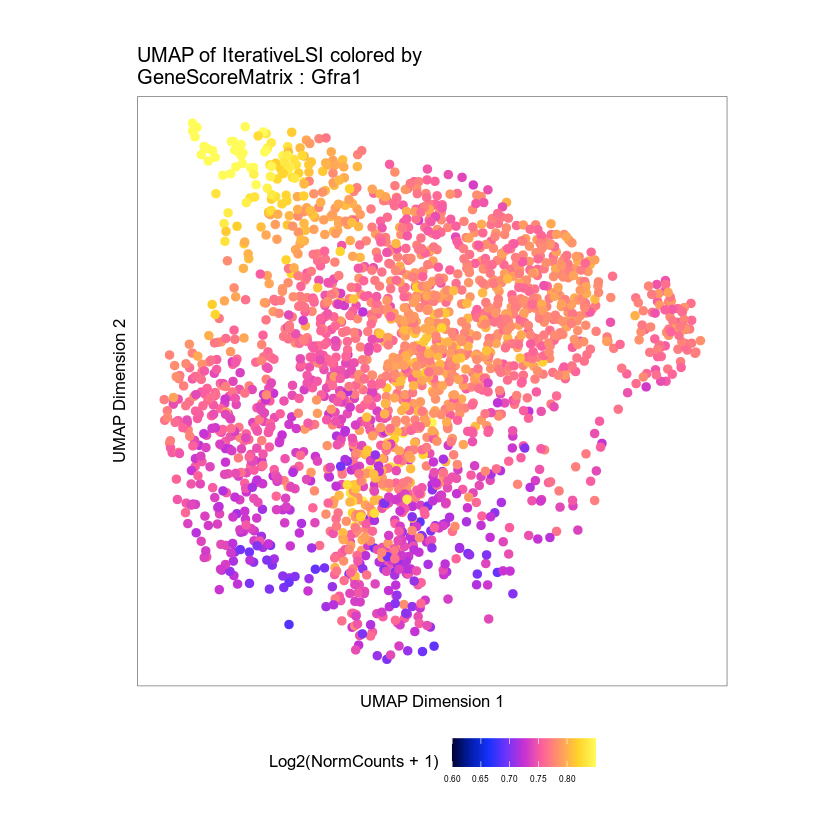

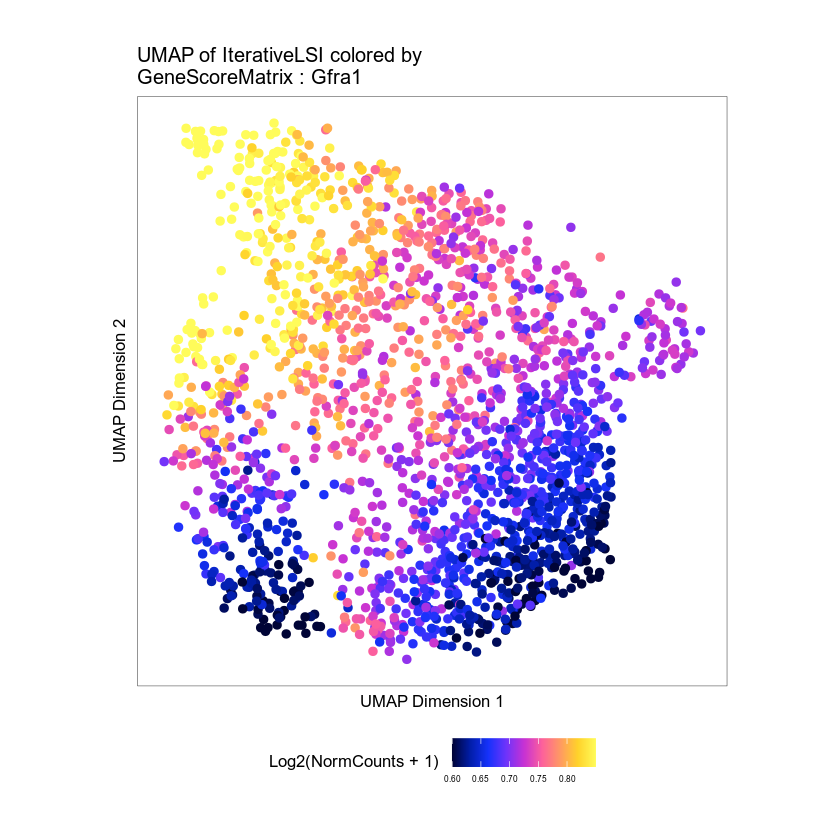

In [82]:
#Gfra1

p1 <- plotEmbedding(
    ArchRProj = Merged.proj.CTRL, 
    colorBy = "GeneScoreMatrix", 
    name = c("Gfra1"), 
    embedding = "UMAP",
    size = 2,
    plotAs = "points",
     imputeWeights = getImputeWeights(Merged.proj.CTRL),
     quantCut = c(0, 1),
    colorLimit =c(0.6,0.85)
    )

p2  <-plotEmbedding(
    ArchRProj = Merged.proj.RA, 
    colorBy = "GeneScoreMatrix", 
    name = c("Gfra1"), 
    embedding = "UMAP",
    size = 2,
    plotAs = "points",
     imputeWeights = getImputeWeights(Merged.proj.RA),
     quantCut = c(0, 1),
    colorLimit =c(0.6,0.85)
    )
# pdf(file = "CTRLvRA.Plppr3.sep.pdf")
p1
p2
# dev.off()

In [369]:

p1 <- plotEmbedding(
    ArchRProj = Merged.proj.CTRL, 
    colorBy = "GeneScoreMatrix", 
    name = c("Cyp26a1"), 
    embedding = "UMAP",
    size = 2,
    plotAs = "points",
     imputeWeights = getImputeWeights(Merged.proj.CTRL),
     quantCut = c(0, 1),
    colorLimit =c(0.6,0.85)
    )

p2  <-plotEmbedding(
    ArchRProj = Merged.proj.RA, 
    colorBy = "GeneScoreMatrix", 
    name = c("Cyp26a1"), 
    embedding = "UMAP",
    size = 2,
    plotAs = "points",
     imputeWeights = getImputeWeights(Merged.proj.RA),
     quantCut = c(0, 1),
    colorLimit =c(0.6,0.85)
    )
pdf(file = "CTRLvRA.Cyp26a1.sep.pdf")
p1
p2
dev.off()

Getting ImputeWeights

ArchR logging to : ArchRLogs/ArchR-plotEmbedding-74f95d325b34-Date-2021-11-17_Time-11-37-27.log
If there is an issue, please report to github with logFile!

Getting UMAP Embedding

ColorBy = GeneScoreMatrix

Getting Matrix Values...

2021-11-17 11:37:27 : 

1 


Imputing Matrix

Using weights on disk

1 of 1

Plotting Embedding

1 


ArchR logging successful to : ArchRLogs/ArchR-plotEmbedding-74f95d325b34-Date-2021-11-17_Time-11-37-27.log

Getting ImputeWeights

ArchR logging to : ArchRLogs/ArchR-plotEmbedding-74f98955378-Date-2021-11-17_Time-11-37-28.log
If there is an issue, please report to github with logFile!

Getting UMAP Embedding

ColorBy = GeneScoreMatrix

Getting Matrix Values...

2021-11-17 11:37:28 : 

1 


Imputing Matrix

Using weights on disk

1 of 1

Plotting Embedding

1 


ArchR logging successful to : ArchRLogs/ArchR-plotEmbedding-74f98955378-Date-2021-11-17_Time-11-37-28.log



png 
  2

In [366]:

p1 <- plotEmbedding(
    ArchRProj = Merged.proj.CTRL, 
    colorBy = "GeneScoreMatrix", 
    name = c("Rxra"), 
    embedding = "UMAP",
    size = 2,
    plotAs = "points",
     imputeWeights = getImputeWeights(Merged.proj.CTRL),
     quantCut = c(0, 1),
    colorLimit =c(1,1.5)
    )

p2  <-plotEmbedding(
    ArchRProj = Merged.proj.RA, 
    colorBy = "GeneScoreMatrix", 
    name = c("Rxra"), 
    embedding = "UMAP",
    size = 2,
    plotAs = "points",
     imputeWeights = getImputeWeights(Merged.proj.RA),
     quantCut = c(0, 1),
    colorLimit =c(1,1.5)
    )
pdf(file = "CTRLvRA.Rxra.sep.pdf")
p1
p2
dev.off()

Getting ImputeWeights

ArchR logging to : ArchRLogs/ArchR-plotEmbedding-74f9389511b5-Date-2021-11-17_Time-11-35-02.log
If there is an issue, please report to github with logFile!

Getting UMAP Embedding

ColorBy = GeneScoreMatrix

Getting Matrix Values...

2021-11-17 11:35:02 : 

1 


Imputing Matrix

Using weights on disk

1 of 1

Plotting Embedding

1 


ArchR logging successful to : ArchRLogs/ArchR-plotEmbedding-74f9389511b5-Date-2021-11-17_Time-11-35-02.log

Getting ImputeWeights

ArchR logging to : ArchRLogs/ArchR-plotEmbedding-74f96c47e5b8-Date-2021-11-17_Time-11-35-04.log
If there is an issue, please report to github with logFile!

Getting UMAP Embedding

ColorBy = GeneScoreMatrix

Getting Matrix Values...

2021-11-17 11:35:04 : 

1 


Imputing Matrix

Using weights on disk

1 of 1

Plotting Embedding

1 


ArchR logging successful to : ArchRLogs/ArchR-plotEmbedding-74f96c47e5b8-Date-2021-11-17_Time-11-35-04.log



png 
  2

In [186]:

p1 <- plotEmbedding(
    ArchRProj = Merged.proj.CTRL, 
    colorBy = "GeneScoreMatrix", 
    name = c("Kit"), 
    embedding = "UMAP",
    size = 2,
    plotAs = "points",
     imputeWeights = getImputeWeights(Merged.proj.CTRL),
     quantCut = c(0, 1),
    colorLimit =c(0.6,0.8)
    )

p2  <-plotEmbedding(
    ArchRProj = Merged.proj.RA, 
    colorBy = "GeneScoreMatrix", 
    name = c("Kit"), 
    embedding = "UMAP",
    size = 2,
    plotAs = "points",
     imputeWeights = getImputeWeights(Merged.proj.RA),
     quantCut = c(0, 1),
    colorLimit =c(0.6,0.8)
    )
pdf(file = "CTRLvRA.Kit.sep.pdf")
p1
p2
dev.off()

Getting ImputeWeights

ArchR logging to : ArchRLogs/ArchR-plotEmbedding-74f919acf84d-Date-2021-10-18_Time-12-49-17.log
If there is an issue, please report to github with logFile!

Getting UMAP Embedding

ColorBy = GeneScoreMatrix

Getting Matrix Values...

2021-10-18 12:49:17 : 

1 


Imputing Matrix

Using weights on disk

1 of 1

Plotting Embedding

1 


ArchR logging successful to : ArchRLogs/ArchR-plotEmbedding-74f919acf84d-Date-2021-10-18_Time-12-49-17.log

Getting ImputeWeights

ArchR logging to : ArchRLogs/ArchR-plotEmbedding-74f9295ad662-Date-2021-10-18_Time-12-49-18.log
If there is an issue, please report to github with logFile!

Getting UMAP Embedding

ColorBy = GeneScoreMatrix

Getting Matrix Values...

2021-10-18 12:49:18 : 

1 


Imputing Matrix

Using weights on disk

1 of 1

Plotting Embedding

1 


ArchR logging successful to : ArchRLogs/ArchR-plotEmbedding-74f9295ad662-Date-2021-10-18_Time-12-49-18.log



png 
  2

Getting ImputeWeights

ArchR logging to : ArchRLogs/ArchR-plotEmbedding-74f92b6e3653-Date-2021-10-26_Time-10-59-43.log
If there is an issue, please report to github with logFile!

Getting UMAP Embedding

ColorBy = GeneScoreMatrix

Getting Matrix Values...

2021-10-26 10:59:43 : 

1 


Imputing Matrix

Using weights on disk

1 of 1

Plotting Embedding

1 


ArchR logging successful to : ArchRLogs/ArchR-plotEmbedding-74f92b6e3653-Date-2021-10-26_Time-10-59-43.log

Getting ImputeWeights

ArchR logging to : ArchRLogs/ArchR-plotEmbedding-74f9453b4dd-Date-2021-10-26_Time-10-59-44.log
If there is an issue, please report to github with logFile!

Getting UMAP Embedding

ColorBy = GeneScoreMatrix

Getting Matrix Values...

2021-10-26 10:59:44 : 

1 


Imputing Matrix

Using weights on disk

1 of 1

Plotting Embedding

1 


ArchR logging successful to : ArchRLogs/ArchR-plotEmbedding-74f9453b4dd-Date-2021-10-26_Time-10-59-44.log



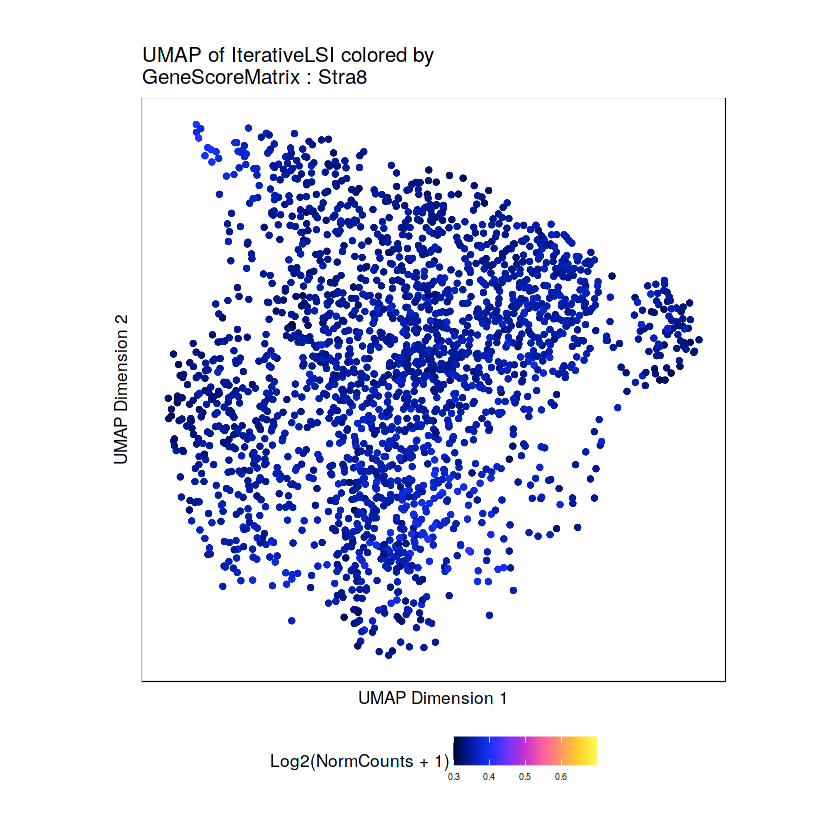

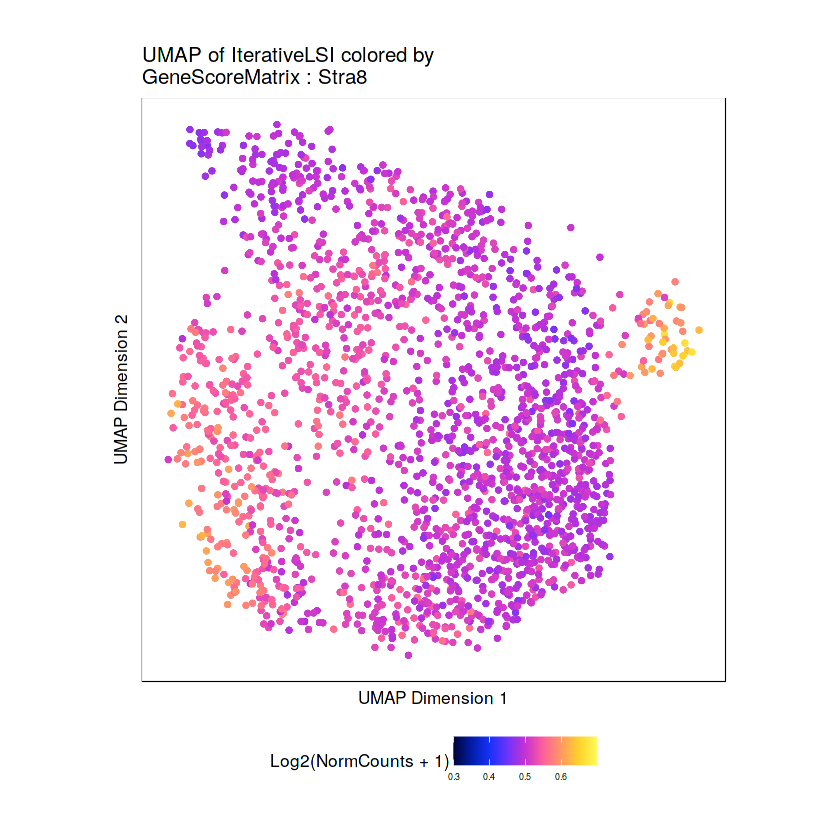

In [218]:
p1 <- plotEmbedding(
    ArchRProj = Merged.proj.CTRL, 
    colorBy = "GeneScoreMatrix", 
    name = c("Stra8"), 
    embedding = "UMAP",
    size = 2,
    plotAs = "points",
     imputeWeights = getImputeWeights(Merged.proj.CTRL),
     quantCut = c(0, 1),
    colorLimit =c(0.3,0.7)
    )

p2 <- plotEmbedding(
    ArchRProj = Merged.proj.RA, 
    colorBy = "GeneScoreMatrix", 
    name = c("Stra8"), 
    embedding = "UMAP",
    size = 2,
    plotAs = "points",
     imputeWeights = getImputeWeights(Merged.proj.RA),
     quantCut = c(0, 1),
    colorLimit =c(0.3,0.7)
    )
p1
p2

In [219]:
p1 <- plotEmbedding(
    ArchRProj = Merged.proj.CTRL, 
    colorBy = "GeneScoreMatrix", 
    name = c("Stra8"), 
    embedding = "UMAP",
    size = 2,
    plotAs = "points",
     imputeWeights = getImputeWeights(Merged.proj.CTRL),
     quantCut = c(0, 1),
    colorLimit =c(0.3,0.7)
    )

p2 <- plotEmbedding(
    ArchRProj = Merged.proj.RA, 
    colorBy = "GeneScoreMatrix", 
    name = c("Stra8"), 
    embedding = "UMAP",
    size = 2,
    plotAs = "points",
     imputeWeights = getImputeWeights(Merged.proj.RA),
     quantCut = c(0, 1),
    colorLimit =c(0.3,0.7)
    )
pdf(file = "CTRLvRA.Stra8.sep.pdf")
p1
p2
dev.off()

Getting ImputeWeights

ArchR logging to : ArchRLogs/ArchR-plotEmbedding-74f915cc1a8f-Date-2021-10-26_Time-11-00-19.log
If there is an issue, please report to github with logFile!

Getting UMAP Embedding

ColorBy = GeneScoreMatrix

Getting Matrix Values...

2021-10-26 11:00:19 : 

1 


Imputing Matrix

Using weights on disk

1 of 1

Plotting Embedding

1 


ArchR logging successful to : ArchRLogs/ArchR-plotEmbedding-74f915cc1a8f-Date-2021-10-26_Time-11-00-19.log

Getting ImputeWeights

ArchR logging to : ArchRLogs/ArchR-plotEmbedding-74f926b0353-Date-2021-10-26_Time-11-00-20.log
If there is an issue, please report to github with logFile!

Getting UMAP Embedding

ColorBy = GeneScoreMatrix

Getting Matrix Values...

2021-10-26 11:00:20 : 

1 


Imputing Matrix

Using weights on disk

1 of 1

Plotting Embedding

1 


ArchR logging successful to : ArchRLogs/ArchR-plotEmbedding-74f926b0353-Date-2021-10-26_Time-11-00-20.log



png 
  2

In [187]:
p1 <- plotEmbedding(
    ArchRProj = Merged.proj.CTRL, 
    colorBy = "GeneScoreMatrix", 
    name = c("Stra8"), 
    embedding = "UMAP",
    size = 2,
    plotAs = "points",
     imputeWeights = getImputeWeights(Merged.proj.CTRL),
     quantCut = c(0, 1),
    colorLimit =c(0.45,0.7)
    )

p2 <- plotEmbedding(
    ArchRProj = Merged.proj.RA, 
    colorBy = "GeneScoreMatrix", 
    name = c("Stra8"), 
    embedding = "UMAP",
    size = 2,
    plotAs = "points",
     imputeWeights = getImputeWeights(Merged.proj.RA),
     quantCut = c(0, 1),
    colorLimit =c(0.45,0.7)
    )
# pdf(file = "CTRLvRA.Stra8.sep.pdf")
# p1
# p2
# dev.off()

Getting ImputeWeights

ArchR logging to : ArchRLogs/ArchR-plotEmbedding-74f95a16b158-Date-2021-10-18_Time-12-50-21.log
If there is an issue, please report to github with logFile!

Getting UMAP Embedding

ColorBy = GeneScoreMatrix

Getting Matrix Values...

2021-10-18 12:50:21 : 

1 


Imputing Matrix

Using weights on disk

1 of 1

Plotting Embedding

1 


ArchR logging successful to : ArchRLogs/ArchR-plotEmbedding-74f95a16b158-Date-2021-10-18_Time-12-50-21.log

Getting ImputeWeights

ArchR logging to : ArchRLogs/ArchR-plotEmbedding-74f93db96b34-Date-2021-10-18_Time-12-50-22.log
If there is an issue, please report to github with logFile!

Getting UMAP Embedding

ColorBy = GeneScoreMatrix

Getting Matrix Values...

2021-10-18 12:50:22 : 

1 


Imputing Matrix

Using weights on disk

1 of 1

Plotting Embedding

1 


ArchR logging successful to : ArchRLogs/ArchR-plotEmbedding-74f93db96b34-Date-2021-10-18_Time-12-50-22.log



png 
  2

In [ ]:
p1 <- plotEmbedding(
    ArchRProj = Merged.proj.CTRL, 
    colorBy = "GeneScoreMatrix", 
    name = c("Stra8"), 
    embedding = "UMAP",
    size = 2,
    plotAs = "points",
     imputeWeights = getImputeWeights(Merged.proj.CTRL),
     quantCut = c(0, 1),
    colorLimit =c(0.45,0.7)
    )

p2 <- plotEmbedding(
    ArchRProj = Merged.proj.RA, 
    colorBy = "GeneScoreMatrix", 
    name = c("Stra8"), 
    embedding = "UMAP",
    size = 2,
    plotAs = "points",
     imputeWeights = getImputeWeights(Merged.proj.RA),
     quantCut = c(0, 1),
    colorLimit =c(0.45,0.7)
    )
pdf(file = "CTRLvRA.Stra8.sep.pdf")
p1
p2
dev.off()c

Getting ImputeWeights

ArchR logging to : ArchRLogs/ArchR-plotEmbedding-74f91d3e10cc-Date-2021-10-15_Time-16-57-29.log
If there is an issue, please report to github with logFile!

Getting UMAP Embedding

ColorBy = GeneScoreMatrix

Getting Matrix Values...

2021-10-15 16:57:30 : 

1 


Imputing Matrix

Using weights on disk

1 of 1

Plotting Embedding

1 


ArchR logging successful to : ArchRLogs/ArchR-plotEmbedding-74f91d3e10cc-Date-2021-10-15_Time-16-57-29.log

Getting ImputeWeights

ArchR logging to : ArchRLogs/ArchR-plotEmbedding-74f94b11ea63-Date-2021-10-15_Time-16-57-31.log
If there is an issue, please report to github with logFile!

Getting UMAP Embedding

ColorBy = GeneScoreMatrix

Getting Matrix Values...

2021-10-15 16:57:31 : 

1 


Imputing Matrix

Using weights on disk

1 of 1

Plotting Embedding

1 


ArchR logging successful to : ArchRLogs/ArchR-plotEmbedding-74f94b11ea63-Date-2021-10-15_Time-16-57-31.log



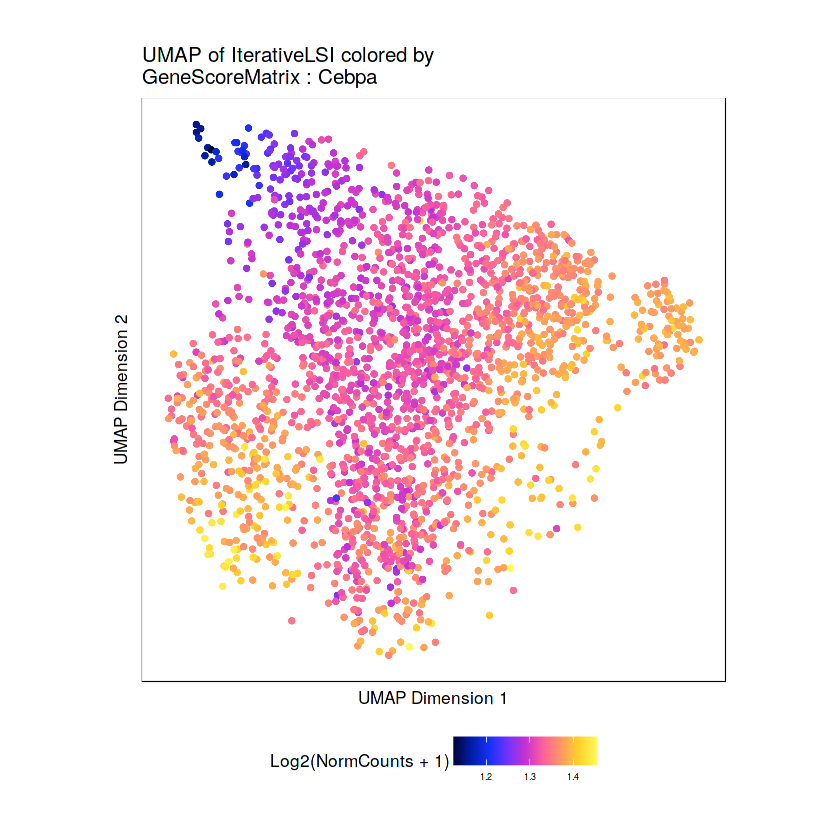

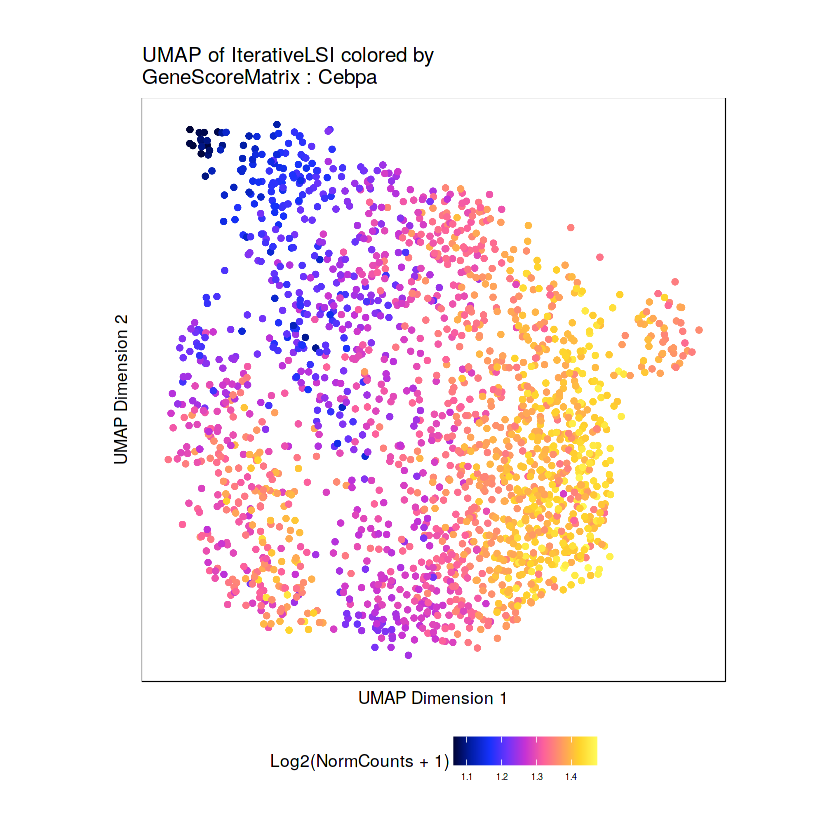

In [184]:
plotEmbedding(
    ArchRProj = Merged.proj.CTRL, 
    colorBy = "GeneScoreMatrix", 
    name = c("Cebpa"), 
    embedding = "UMAP",
    size = 2,
    plotAs = "points",
     imputeWeights = getImputeWeights(Merged.proj.CTRL),
     quantCut = c(0, 1),
#     colorLimit =c(0.45,0.7)
    )

plotEmbedding(
    ArchRProj = Merged.proj.RA, 
    colorBy = "GeneScoreMatrix", 
    name = c("Cebpa"), 
    embedding = "UMAP",
    size = 2,
    plotAs = "points",
     imputeWeights = getImputeWeights(Merged.proj.RA),
     quantCut = c(0, 1),
#     colorLimit =c(0.45,0.7)
    )